In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import scipy.constants as scipy_const
import sympy as sp
from astropy import constants as const
from astropy import units as u

plt.rcParams.update({'font.size': 30})

In [2]:
h_u=scipy_const.physical_constants["Planck constant in eV s"]; hbar=(h_u[0]/(2*np.pi))*u.eV*u.s
print(h_u)
print(hbar)
c_u = scipy_const.physical_constants["speed of light in vacuum"]; c =c_u[0]*u.m/u.s
print(c_u)
print(c)
k_B_u = scipy_const.physical_constants["Boltzmann constant in eV/K"]; k_B = k_B_u[0]*u.eV/u.K
print(k_B_u)
print(k_B)

(4.135667662e-15, 'eV s', 2.5e-23)
6.582119513926018e-16 eV s
(299792458.0, 'm s^-1', 0.0)
299792458.0 m / s
(8.6173303e-05, 'eV K^-1', 5e-11)
8.6173303e-05 eV / K


## Widmo fotonów rozproszonych w odwrotnym efekcie Comptona:

$$ \frac{dN_{mono}}{dtd \epsilon_{\gamma}} =  \int_{\epsilon_{min}}^{\infty} \frac{2 \pi r_e^2 c}{E_e^2} \cdot 
\frac{n(\epsilon)}{\epsilon}$$
$E_e$ - energia Elektronu, $\epsilon$ - energia fotonów tła, $\epsilon_{\gamma}$ - energia fotonów gamma

## Gęstość fotonów widma ciała doskonale czarnego o temperaturze $T$ 

$$ n(\epsilon) = \frac{1}{\pi^2 \hbar^3 c^3} \cdot \frac{\epsilon^2}{\exp{ \frac{\epsilon}{k_B T}}-1}$$

In [3]:
def n(epsilon, T=3*u.K):
    A = 1/((np.pi**2)*(hbar**3)*(c**3))
    return A*((epsilon**2)/(np.exp(epsilon.value/(k_B*T).value) -1))

/home/pawel1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


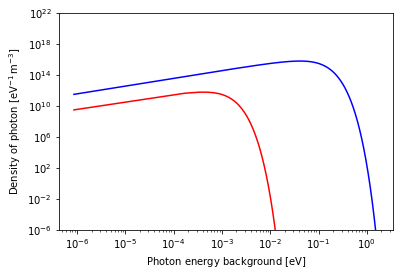

In [6]:
%matplotlib inline
energy_range_epsilon = k_B*np.linspace(0.01, 20000, 10000)*u.K
density_of_photon_3K = n(energy_range_epsilon, T = 3*u.K)

fig, ax0 = plt.subplots()
ax0.loglog(energy_range_epsilon, density_of_photon_3K, 'r-', label="T = 3 K")

density_of_photon_300K = n(energy_range_epsilon, T = 300*u.K)
ax0.loglog(energy_range_epsilon, density_of_photon_300K, 'b-', label="T = 300 K")

ax0.set_xlabel('Photon energy background [{0}]'.format(energy_range_epsilon.unit.to_string('latex_inline')))
ax0.set_ylabel('Density of photon [{0}]'.format(density_of_photon_300K.unit.to_string('latex_inline')))
ax0.set_ylim([1e-6, 1e22])
plt.show()